# 1. Importing Libraries

In [67]:
# Importing the warnings
import warnings
warnings.filterwarnings("ignore")

In [68]:
# Importing all the Libraries

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
# Setting the display option

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

pd.options.display.float_format = '{:.2f}'.format

# 2. Reading the Data set

In [221]:
# Reading the first Data set application_data.csv.

app_data=pd.read_csv("application_data.csv",encoding='unicode_escape')
#app_data=app_data.head(10000)

In [222]:
# Reading the Second Data set previous_application.csv

prev_app_data=pd.read_csv("previous_application.csv",encoding='unicode_escape')
prev_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,0.00,17145.00,SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,nan,607500.00,THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,nan,112500.00,TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,nan,450000.00,MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,nan,337500.00,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,nan,nan,nan,nan,nan,nan


In [223]:
# Reading the third Data set columns_description.csv

col_desc=pd.read_csv("columns_description.csv",encoding='unicode_escape')
col_desc

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
155,209,previous_application.csv,DAYS_FIRST_DUE,Relative to application date of current applic...,time only relative to the application
156,210,previous_application.csv,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current applic...,time only relative to the application
157,211,previous_application.csv,DAYS_LAST_DUE,Relative to application date of current applic...,time only relative to the application
158,212,previous_application.csv,DAYS_TERMINATION,Relative to application date of current applic...,time only relative to the application


In [224]:
# Getting the shape of first Data frame app_data

app_data.shape


(307511, 122)

In [225]:
# Getting the shape of second Data frame prev_app_data

prev_app_data.shape

(1670214, 37)

In [226]:
# Getting the shape of third Data frame col_desc

col_desc.shape

(160, 5)

In [227]:
# Getting the info of first Data frame app_data

app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [228]:
# Getting the info of second Data frame prev_app_data

prev_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [229]:
# Getting the info of third Data frame col_desc

col_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
Unnamed: 0     160 non-null int64
Table          160 non-null object
Row            160 non-null object
Description    160 non-null object
Special        69 non-null object
dtypes: int64(1), object(4)
memory usage: 6.4+ KB


In [230]:
#Print the head of the data frame.

app_data.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,nan,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,nan,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,nan,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.56,0.73,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0

In [231]:
#Print the head of the data frame.

prev_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,0.00,17145.00,SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,nan,607500.00,THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,nan,112500.00,TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,nan,450000.00,MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,nan,337500.00,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,nan,nan,nan,nan,nan,nan


In [232]:
col_desc.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


# 3. Data Cleaning

## 3.1 Duplicate

In [84]:
# Checking for duplicate records in the dataframe.

app_data.drop_duplicates()
app_data.shape

# There are no duplicate in app_data records.

(307511, 122)

In [85]:
# Checking for duplicate records in the dataframe.

prev_app_data.drop_duplicates()
prev_app_data.shape

# There are no duplicate in prev_app_data records.

(1670214, 37)

In [86]:
# Checking for duplicate records in the dataframe.

col_desc.drop_duplicates()
col_desc.shape

# There are no duplicate in col_desc records.

(160, 5)

## 3.2 Handling Single Unique Value

In [87]:
# Remove columns where number of unique value is only 1

app_data_unique = app_data.nunique()
app_data_unique = app_data_unique[app_data_unique.values == 1]

app_data_unique

# No column with Single unique value

Series([], dtype: int64)

## 3.3 Handling Null Values in app_data data frame

In [89]:
total = app_data.isnull().sum().sort_values(ascending = False)
percent = (app_data.isnull().sum()/app_data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
...,...,...
REG_CITY_NOT_LIVE_CITY,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000
HOUR_APPR_PROCESS_START,0,0.000000


In [90]:
# verifying the null value of app_data data frame

app_data_null = app_data.isnull().sum()
app_data_null = app_data_null[app_data_null.values >0]
app_data_null


AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      2
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_M

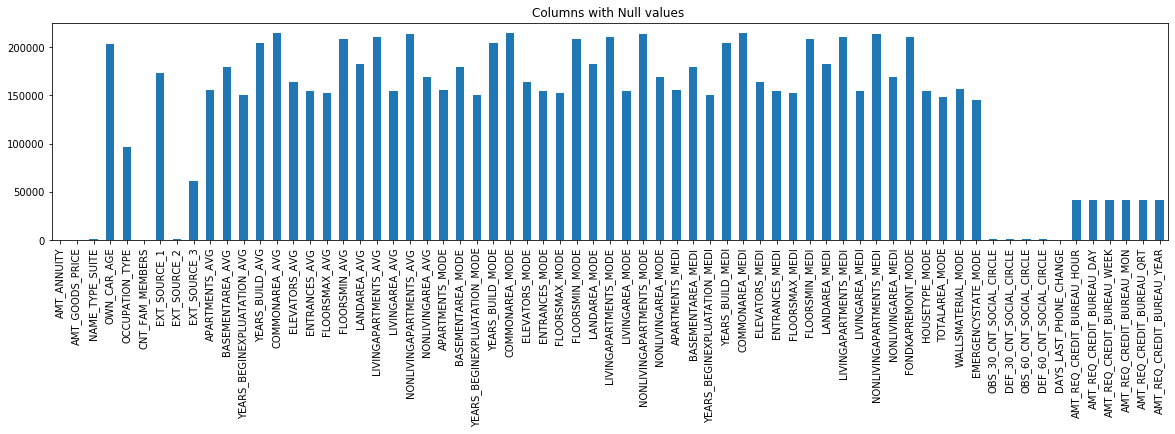

In [91]:
plt.figure(figsize=(20,4))
app_data_null.plot(kind='bar')
plt.title('Columns with Null values ')
plt.show()

In [92]:
app_data.shape

(307511, 122)

In [97]:
# Dropping all the columns with more than 60% Null Value.

def percentage(df):
     return round(100*(df.isnull().sum()/df.shape[0]),4).sort_values(ascending=False) 

app_data=app_data.loc[:,percentage(app_data) < 60.0000]


In [98]:
# 105 columns are left behind app_data data frame

app_data.shape


(307511, 105)

In [99]:
# Now showing only those columns which has less than 10% null values

app_data_null_2 = app_data_null[app_data_null.values <(0.15*len(app_data))]
app_data_null_2

AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
CNT_FAM_MEMBERS                   2
EXT_SOURCE_2                    660
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [100]:
# Since DAYS_LAST_PHONE_CHANGE has only 1 row with null value
#Deleting null value from app_data_analysis where DAYS_LAST_PHONE_CHANGE is null (i.e 1)

app_data = app_data[~np.isnan(app_data['DAYS_LAST_PHONE_CHANGE'])]

In [101]:
# Since CNT_FAM_MEMBERS has only 2 row with null value
#Deleting null value from app_data_analysis where CNT_FAM_MEMBERS is null (i.e 2)

app_data = app_data[~np.isnan(app_data['CNT_FAM_MEMBERS'])]

In [102]:
# Since AMT_GOODS_PRICE is "For consumer loans it is the price of the goods for which the loan is given".
# AMT_GOODS_PRICE has 278 missing values.

round(app_data.AMT_GOODS_PRICE.mean(),2)

538397.14

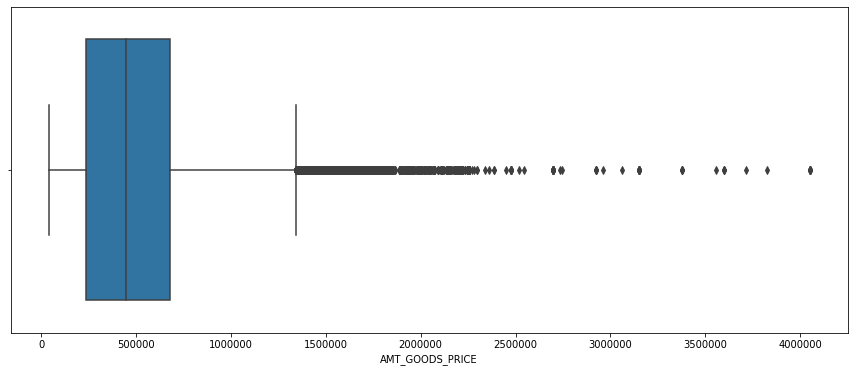

In [236]:
plt.figure(figsize=(15,6))
sns.boxplot(app_data['AMT_GOODS_PRICE'])

In [234]:
app_data['AMT_GOODS_PRICE'] = app_data['AMT_GOODS_PRICE'].fillna((app_data['AMT_GOODS_PRICE'].median()))

# As there are outliers present filling na with median.

In [235]:
app_data.AMT_GOODS_PRICE.isnull().sum()

0

In [105]:
# since AMT_REQ_CREDIT_BUREAU_HOUR is Number of enquiries to Credit Bureau about the client one hour before application
# It has 5 Unique values from 0-4. As it defines as enquiries to Credit Bureau which would be almost same for all the clients
#we can safely impute the null values with the most frequestly used value i.e mode of the column.

app_data.AMT_REQ_CREDIT_BUREAU_HOUR.unique()
app_data.AMT_REQ_CREDIT_BUREAU_HOUR.mode()

0    0.0
dtype: float64

In [106]:
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0], inplace=True)

In [107]:
app_data.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

41517

In [108]:
# Doing the same thing for AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,
# AMT_REQ_CREDIT_BUREAU_MON , AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR

app_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0], inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0], inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0], inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0], inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0], inplace=True)


In [109]:
app_data.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()
app_data.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()
app_data.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()
app_data.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()
app_data.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

0

In [110]:
# Removing XNA from all the rows for CODE_GENDER & ORGANIZATION_TYPE

app_data.drop(app_data[app_data['CODE_GENDER']=='XNA'].index , inplace =True)
app_data.drop(app_data[app_data['ORGANIZATION_TYPE']=='XNA'].index , inplace =True)

# 4. Subsetting the data set

In [111]:
# Out of 105 columns selecting 28 columns for out analysis.
# Creating a new Data frame with these 28 columns

app_data_analysis = app_data[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','TOTALAREA_MODE','EMERGENCYSTATE_MODE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']].copy()

In [113]:
app_data_analysis.shape

(252130, 28)

In [112]:
app_data_analysis.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,Laborers,1.0,2,2,Business Entity Type 3,0.0149,No,2.0,2.0,2.0,2.0,-1134.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,Core staff,2.0,1,1,School,0.0714,No,1.0,0.0,1.0,0.0,-828.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,Laborers,1.0,2,2,Government,NaN,NaN,0.0,0.0,0.0,0.0,-815.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,Laborers,2.0,2,2,Business Entity Type 3,NaN,NaN,2.0,0.0,2.0,0.0,-617.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,Core staff,1.0,2,2,Religion,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0


## 4.1 Checking the data type for all the columns & Treating them

In [114]:
app_data_analysis.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
ORGANIZATION_TYPE               object
TOTALAREA_MODE                 float64
EMERGENCYSTATE_MODE             object
OBS_30_CNT_SOCIAL_CIRCLE       float64
DEF_30_CNT_SOCIAL_CIRCLE       float64
OBS_60_CNT_SOCIAL_CIRCLE 

In [115]:
# Lets change the dtype for DAYS_LAST_PHONE_CHANGE from float64 to int64. 

app_data_analysis.DAYS_LAST_PHONE_CHANGE.astype('int64')

0        -1134
1         -828
2         -815
3         -617
4        -1106
          ... 
307504       0
307506    -273
307508   -1909
307509    -322
307510    -787
Name: DAYS_LAST_PHONE_CHANGE, Length: 252130, dtype: int64

In [116]:
# Lets change the dtype for DAYS_REGISTRATION from float64 to int64. 
#But before doing that we have to check the sum of null values in this column
# Its gives 0 null Value. 

app_data_analysis.DAYS_REGISTRATION.isnull().sum()


0

In [117]:
#changing the dtype for DAYS_LAST_PHONE_CHANGE from float64 to int64. 

app_data_analysis.DAYS_REGISTRATION.astype('int64')

0        -3648
1        -1186
2        -4260
3        -9833
4        -4311
          ... 
307504   -9798
307506   -8456
307508   -6737
307509   -2562
307510   -5128
Name: DAYS_REGISTRATION, Length: 252130, dtype: int64

In [118]:
app_data_analysis.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,Laborers,1.0,2,2,Business Entity Type 3,0.0149,No,2.0,2.0,2.0,2.0,-1134.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,Core staff,2.0,1,1,School,0.0714,No,1.0,0.0,1.0,0.0,-828.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,Laborers,1.0,2,2,Government,NaN,NaN,0.0,0.0,0.0,0.0,-815.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,Laborers,2.0,2,2,Business Entity Type 3,NaN,NaN,2.0,0.0,2.0,0.0,-617.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,Core staff,1.0,2,2,Religion,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0


#### Changing CNT_FAM_MEMBERS from float to int64 as family members cannot be in decimal. It would be always full value.

In [119]:
app_data_analysis.CNT_FAM_MEMBERS.isnull().sum()

0

In [120]:
#app_data_analysis.CNT_FAM_MEMBERS.astype(int)
#app_data_analysis['CNT_FAM_MEMBERS']=round(app_data_analysis['CNT_FAM_MEMBERS'],0)
app_data_analysis['CNT_FAM_MEMBERS']=app_data_analysis['CNT_FAM_MEMBERS'].apply(lambda x:int(x))

In [121]:
app_data_analysis.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,Laborers,1,2,2,Business Entity Type 3,0.0149,No,2.0,2.0,2.0,2.0,-1134.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,Core staff,2,1,1,School,0.0714,No,1.0,0.0,1.0,0.0,-828.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,Laborers,1,2,2,Government,NaN,NaN,0.0,0.0,0.0,0.0,-815.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,Laborers,2,2,2,Business Entity Type 3,NaN,NaN,2.0,0.0,2.0,0.0,-617.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,Core staff,1,2,2,Religion,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0


## 4.2 Removing negative sign from column DAYS_BIRTH , DAYS_EMPLOYED  DAYS_REGISTRATION & DAYS_LAST_PHONE_CHANGE

In [122]:
# Removing negative from DAYS_BIRTH

app_data_analysis['DAYS_BIRTH'] = app_data_analysis['DAYS_BIRTH'].astype(str).str[1:].astype(np.int64)


In [123]:
# Removing negative from DAYS_EMPLOYED


app_data_analysis['DAYS_EMPLOYED']= app_data_analysis['DAYS_EMPLOYED'].apply(lambda x: re.findall('\d+', str(x))[0])
app_data_analysis['DAYS_EMPLOYED'] = app_data_analysis['DAYS_EMPLOYED'].apply(lambda x: pd.to_numeric(x))



In [124]:
# Removing negative from DAYS_REGISTRATION


app_data_analysis['DAYS_REGISTRATION']= app_data_analysis['DAYS_REGISTRATION'].apply(lambda x: re.findall('\d+', str(x))[0])
app_data_analysis['DAYS_REGISTRATION'] = app_data_analysis['DAYS_REGISTRATION'].apply(lambda x: pd.to_numeric(x))



In [125]:
# Removing negative from DAYS_LAST_PHONE_CHANGE


app_data_analysis['DAYS_LAST_PHONE_CHANGE']= app_data_analysis['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: re.findall('\d+', str(x))[0])
app_data_analysis['DAYS_LAST_PHONE_CHANGE'] = app_data_analysis['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: pd.to_numeric(x))


In [126]:
app_data_analysis.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648,Laborers,1,2,2,Business Entity Type 3,0.0149,No,2.0,2.0,2.0,2.0,1134
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186,Core staff,2,1,1,School,0.0714,No,1.0,0.0,1.0,0.0,828
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260,Laborers,1,2,2,Government,NaN,NaN,0.0,0.0,0.0,0.0,815
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,9833,Laborers,2,2,2,Business Entity Type 3,NaN,NaN,2.0,0.0,2.0,0.0,617
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,4311,Core staff,1,2,2,Religion,NaN,NaN,0.0,0.0,0.0,0.0,1106


In [127]:
# Identifying wheather the column is catagorical or not.

app_data_analysis.nunique()

SK_ID_CURR                     252130
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2266
AMT_CREDIT                       5331
AMT_ANNUITY                     13190
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    7
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  5
NAME_HOUSING_TYPE                   6
DAYS_BIRTH                      16513
DAYS_EMPLOYED                   12573
DAYS_REGISTRATION               14418
OCCUPATION_TYPE                    18
CNT_FAM_MEMBERS                    17
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
ORGANIZATION_TYPE                  57
TOTALAREA_MODE                   5020
EMERGENCYSTATE_MODE                 2
OBS_30_CNT_SOCIAL_CIRCLE           32
DEF_30_CNT_SOCIAL_CIRCLE            9
OBS_60_CNT_SOCIAL_CIRCLE           32
DEF_60_CNT_S

# 5. Checking Outliers & Treating them

### 5.1 Treating outlier for AMT_INCOME_TOTAL by truncating the outlier

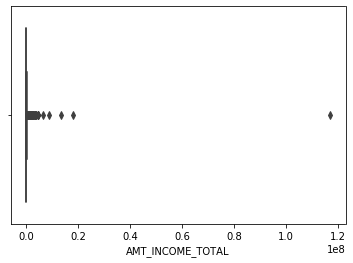

In [128]:
# Taking AMT_INCOME_TOTAL and creating a boxplot for the same to identify if we have any outlier

sns.boxplot(app_data_analysis['AMT_INCOME_TOTAL'])

# According to the boxplot it has a outlier.

In [129]:
app_data_analysis1 = app_data_analysis[(app_data_analysis.AMT_INCOME_TOTAL>100000000)]
app_data_analysis1.head()

# As we can see there is a value with AMT_INCOME_TOTAL  more than 100 Million. 
# And it is much more than the average value of AMT_INCOME_TOTAL which is 168797.03
# This Value should be truncated in order to give us better analysis

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
12840,114967,1,Cash loans,F,1,117000000.0,562491.0,26194.5,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,12615,922,6762,Laborers,3,2,2,Business Entity Type 3,0.0715,No,0.0,0.0,0.0,0.0,0


In [130]:
app_data_analysis.drop(app_data_analysis[app_data_analysis.AMT_INCOME_TOTAL > 100000000].index, inplace=True)
app_data_analysis.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648,Laborers,1,2,2,Business Entity Type 3,0.0149,No,2.0,2.0,2.0,2.0,1134
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186,Core staff,2,1,1,School,0.0714,No,1.0,0.0,1.0,0.0,828
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260,Laborers,1,2,2,Government,NaN,NaN,0.0,0.0,0.0,0.0,815
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,9833,Laborers,2,2,2,Business Entity Type 3,NaN,NaN,2.0,0.0,2.0,0.0,617
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,4311,Core staff,1,2,2,Religion,NaN,NaN,0.0,0.0,0.0,0.0,1106


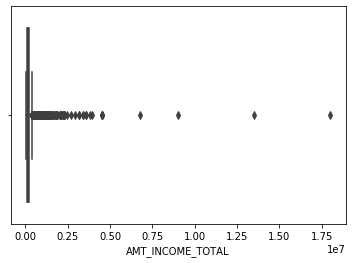

In [131]:
# Again verifying the boxplot. As we can see now there is no extreme outlier.
sns.boxplot(app_data_analysis['AMT_INCOME_TOTAL'])


### 5.2 Treating outlier for CNT_FAM_MEMBERS by Capping the outlier

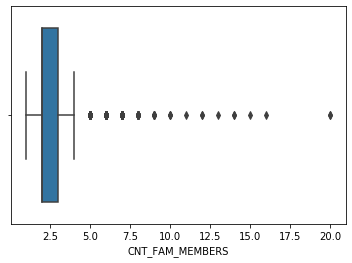

In [132]:
# Taking AMT_INCOME_TOTAL and creating a boxplot for the same to identify if we have any outlier

sns.boxplot(app_data_analysis['CNT_FAM_MEMBERS'])

# According to the boxplot it has a outlier.

In [133]:
app_data_analysis.CNT_FAM_MEMBERS.unique()

array([ 1,  2,  3,  4,  5,  6,  9,  7,  8, 10, 13, 14, 12, 20, 15, 16, 11])

In [135]:
app_data_analysis2 = app_data_analysis[(app_data_analysis.CNT_FAM_MEMBERS>16)]
app_data_analysis2.head()

#There are two rows with CNT_FAM_MEMBERS value as 20. 
#Since it is a outlier, we can cap this outlier with the 99th percentile value.

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
155369,280108,0,Cash loans,F,19,112500.0,269550.0,13891.5,Family,Working,Secondary / secondary special,Single / not married,House / apartment,11057,1853,3096,Waiters/barmen staff,20,2,2,Restaurant,NaN,NaN,1.0,1.0,1.0,1.0,744
265784,407877,0,Cash loans,F,19,112500.0,135000.0,8788.5,Unaccompanied,Working,Higher education,Single / not married,House / apartment,10297,896,4733,Core staff,20,2,2,Kindergarten,0.0427,No,1.0,0.0,1.0,0.0,2495


In [136]:
percentiles = app_data_analysis['CNT_FAM_MEMBERS'].quantile([.99]).values

app_data_analysis['CNT_FAM_MEMBERS'][app_data_analysis['CNT_FAM_MEMBERS'] > 16] = percentiles[0]

In [137]:
app_data_analysis.CNT_FAM_MEMBERS.unique()

# As we can see we have capped the CNT_FAM_MEMBERS with 99th percentile value . 
# Value 20 has been removed.

array([ 1,  2,  3,  4,  5,  6,  9,  7,  8, 10, 13, 14, 12, 15, 16, 11])

### 5.3 Treating outlier for AMT_ANNUITY by IQR Method¶

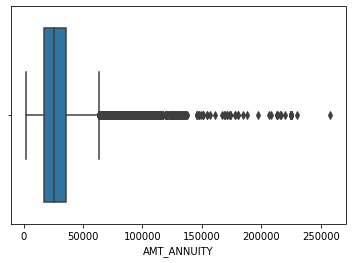

In [138]:
# Taking AMT_INCOME_TOTAL and creating a boxplot for the same to identify if we have any outlier

sns.boxplot(app_data_analysis['AMT_ANNUITY'])

# According to the boxplot it has a outlier.

In [139]:
app_data['AMT_ANNUITY'].describe()

count    252118.000000
mean      27812.427899
std       14647.911122
min        1980.000000
25%       17073.000000
50%       25834.500000
75%       35617.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [140]:
app_data['AMT_ANNUITY'].quantile([0.25,0.5, 0.75, 0.90, 0.95, 0.99])

0.25    17073.0
0.50    25834.5
0.75    35617.5
0.90    46701.0
0.95    53712.0
0.99    71095.5
Name: AMT_ANNUITY, dtype: float64

In [142]:
#This column has outliers along with missing values (12).

#Fixing Outliers 

Q1 = app_data_analysis['AMT_ANNUITY'].quantile(0.25)
Q3 = app_data_analysis['AMT_ANNUITY'].quantile(0.75)
IQR = Q3 - Q1
app_data_analysis = app_data_analysis.loc[(app_data_analysis['AMT_ANNUITY'] >  (Q1 - 1.5 * IQR))
                                             & (app_data_analysis['AMT_ANNUITY'] < (Q3 + 1.5 * IQR))]


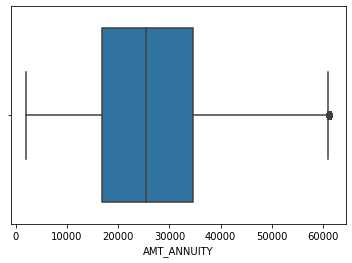

In [143]:
sns.boxplot(app_data_analysis['AMT_ANNUITY'])

# As we can see from boxplot, outlier has been removed.

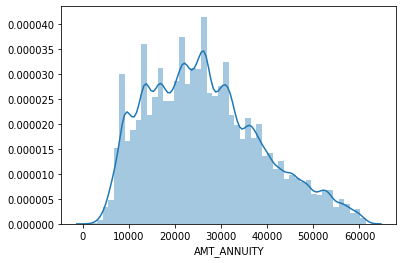

In [144]:
# Afer handeling the outliers ,treating the missing values present in the column 

app_data_analysis['AMT_ANNUITY'].describe()
sns.distplot(app_data_analysis['AMT_ANNUITY'])

In [145]:
# on observing the above disribution , median seems to be a beter soluion then mean 
app_data_analysis['AMT_ANNUITY'] = app_data_analysis['AMT_ANNUITY'].fillna((app_data_analysis['AMT_ANNUITY'].median()))
app_data_analysis['AMT_ANNUITY'].isnull().sum()

0

In [146]:
# Now we can see , the disribution remains the same after immuting null values with median
app_data_analysis['AMT_ANNUITY'].describe()

count    245449.000000
mean      26550.966115
std       12297.523285
min        1980.000000
25%       16875.000000
50%       25402.500000
75%       34510.500000
max       61402.500000
Name: AMT_ANNUITY, dtype: float64

### 5.4 Treating outlier for DAYS_EMPLOYED by Binning Method

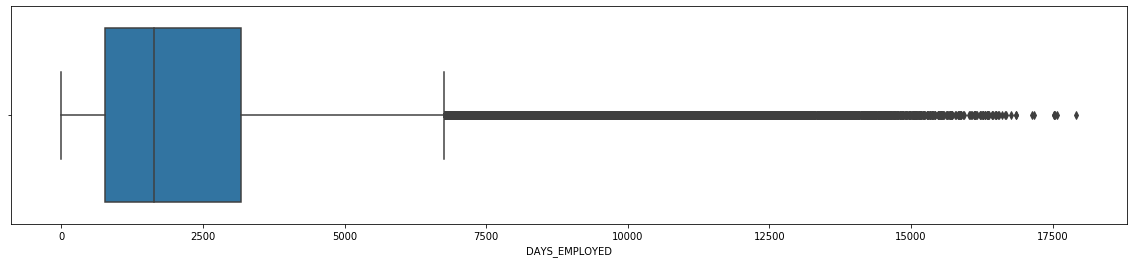

In [147]:
# Taking DAYS_EMPLOYED and creating a boxplot for the same to identify if we have any outlier.
# DAYS_EMPLOYED is How many days before the application the person started current employment
plt.figure(figsize=(20,4))

sns.boxplot(app_data_analysis['DAYS_EMPLOYED'])

# According to the boxplot it has a outlier.

In [148]:
app_data_analysis3 = app_data_analysis[(app_data_analysis.DAYS_EMPLOYED>20000) & (app_data_analysis.DAYS_EMPLOYED<360000)]
app_data_analysis3.shape

# As we can see there is no value for DAYS_EMPLOYED between 20000 days & 360000 days. 
# And there are 54486 values for more than 360000 days. 
# Since 360000 days makes approx 986 years, which is impossible for anyone to be employed. 
# So binning the DAYS_EMPLOYED column.

(0, 28)

In [149]:
app_data_analysis['DAYS_EMPLOYED_BINS'] = pd.cut(x=app_data_analysis['DAYS_EMPLOYED'], bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000,370000],labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])


In [150]:
app_data_analysis.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED_BINS
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648,Laborers,1,2,2,Business Entity Type 3,0.0149,No,2.0,2.0,2.0,2.0,1134,1
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186,Core staff,2,1,1,School,0.0714,No,1.0,0.0,1.0,0.0,828,2
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260,Laborers,1,2,2,Government,NaN,NaN,0.0,0.0,0.0,0.0,815,1
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,9833,Laborers,2,2,2,Business Entity Type 3,NaN,NaN,2.0,0.0,2.0,0.0,617,4
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,4311,Core staff,1,2,2,Religion,NaN,NaN,0.0,0.0,0.0,0.0,1106,4


In [151]:
# So now all the values above 20000 days would fall in one bin with label 21.

### 5.5 Finding outlier for XXXXXXXXXX by Z score & treating it.

Calculate the Z-Score
In this procedure we calculate the z-score for each observation (fix this). Any z-score greater than 3 or less than -3 is considered to be an outlier. This rule of thumb is based on the empirical rule. From this rule we see that almost all of the data (99.7%) should be within three standard deviations from the mean. By calculating the z-score we are standardizing the observation, meaning the standard deviation is now 1. Thus from the empirical rule we expect 99.7% of the z-scores to be within -3 and 3.


We will use Z-score function defined in scipy library to detect the outliers.
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(dataframe( column_name ))
print(z)

threshold = 3
print(np.where(z > 3))



This will give a result as below -

Data points where Z-scores is greater than 3
The first array contains the list of row numbers and second array respective column numbers, whose mean have a Z-score higher than 3.

We tried to calculate this, but our jupyter notebook stoped responding.

# 6. Check data unbalance & Divide into two data frame

In [152]:
# Checking the percentage of imbalance
100*(app_data_analysis['TARGET'].value_counts()/len(app_data))

0    88.803792
1     8.546385
Name: TARGET, dtype: float64

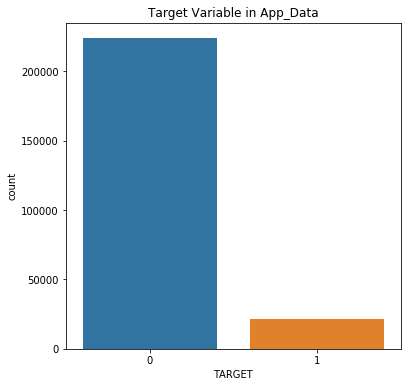

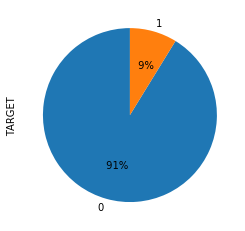

In [153]:
#Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at 
#least one of the first Y installments of the loan in our sample, 0 - all other cases)

plt.figure(figsize = (6,6))
plt.title('Target Variable in App_Data')
sns.countplot(app_data_analysis['TARGET'])

# So as we can see from barplot, approximately 275000 values are for Target 0 while only 25000 fro Target 1.
plt.figure(figsize = (6,4))
app_data_analysis['TARGET'].value_counts().plot.pie(autopct= " %1.0f%%",startangle=90)

In [155]:
# Creating 2 Data Frames for each Target Value

#Target0 = app_data.where[app_data['TARGET']==0,inplace = True)
#Target1 = app_data.where(app_data['TARGET']==1,inplace = True)
Target0 = app_data_analysis[app_data_analysis['TARGET']==0]                  
Target1 = app_data_analysis[app_data_analysis['TARGET']==1]                  

# Removing Target column from each of these two data frames.

del Target0['TARGET']
del Target1['TARGET']

In [156]:
Target0.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED_BINS
1,100003,Cash loans,F,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186,Core staff,2,1,1,School,0.0714,No,1.0,0.0,1.0,0.0,828,2
2,100004,Revolving loans,M,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260,Laborers,1,2,2,Government,NaN,NaN,0.0,0.0,0.0,0.0,815,1
3,100006,Cash loans,F,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,9833,Laborers,2,2,2,Business Entity Type 3,NaN,NaN,2.0,0.0,2.0,0.0,617,4
4,100007,Cash loans,M,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,4311,Core staff,1,2,2,Religion,NaN,NaN,0.0,0.0,0.0,0.0,1106,4
5,100008,Cash loans,M,0,99000.0,490495.5,27517.5,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,16941,1588,4970,Laborers,2,2,2,Other,NaN,NaN,0.0,0.0,0.0,0.0,2536,2


In [157]:
Target1.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED_BINS
0,100002,Cash loans,M,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648,Laborers,1,2,2,Business Entity Type 3,0.0149,No,2.0,2.0,2.0,2.0,1134,1
26,100031,Cash loans,F,0,112500.0,979992.0,27076.5,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,18724,2628,6573,Cooking staff,1,3,2,Business Entity Type 3,0.0085,Yes,10.0,1.0,10.0,0.0,161,3
40,100047,Cash loans,M,0,202500.0,1193580.0,35028.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,17482,1262,1182,Laborers,2,2,2,Business Entity Type 3,0.1463,No,0.0,0.0,0.0,0.0,1075,2
42,100049,Cash loans,F,0,135000.0,288873.0,16258.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,13384,3597,45,Sales staff,2,3,3,Self-employed,NaN,NaN,1.0,0.0,1.0,0.0,1480,4
110,100130,Cash loans,F,1,157500.0,723996.0,30802.5,Unaccompanied,Commercial associate,Incomplete higher,Separated,House / apartment,10526,267,387,Sales staff,2,2,2,Trade: type 2,0.1284,No,0.0,0.0,0.0,0.0,56,1



# 7.1 Univariate Analysis

# 7.1.1 Client gender

Let's see the gender of the clients  the percent of the loans (by client gender) with TARGET=1 i.e Defaulter ( client with payment difficulties) and TARGET=0 i.e Repayers.

Text(0.5, 1.0, 'Gender ratio of defaulter- Target 1')

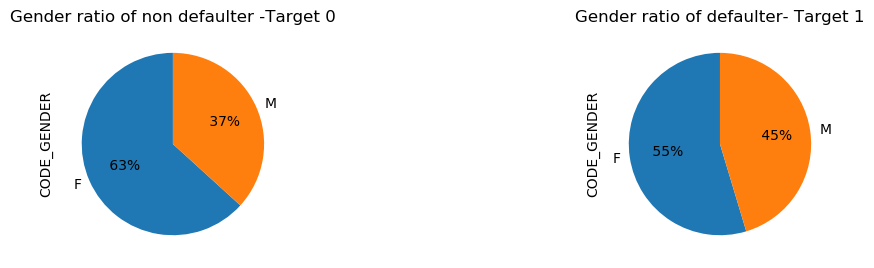

In [161]:

plt.figure(figsize=(10, 20), dpi=100, facecolor='w', edgecolor='k') 
plt.subplot( 4,3, 1)
plt.title('Gender ratio of non defaulter -Target 0')
Target0['CODE_GENDER'].value_counts().plot.pie(autopct= " %1.0f%%",startangle=90)
plt.subplot( 4,3, 3)
Target1['CODE_GENDER'].value_counts().plot.pie(autopct= " %1.0f%%",startangle=90)
plt.title('Gender ratio of defaulter- Target 1')

The number of female clients is almost double the number of male clients. 
Looking to the percent of defaulter dataset , females have a higher chance of not returning their loans

# 7.1.2 Credit distribution

Let's plot the credit distribution

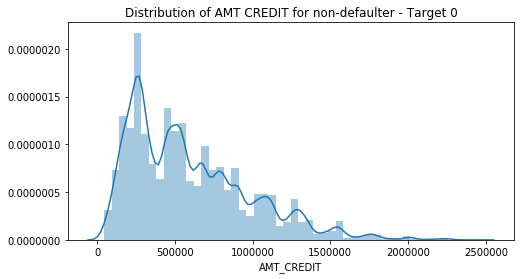

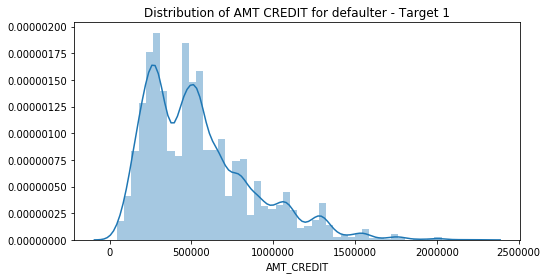

In [162]:
plt.figure(figsize=(8,4))
plt.title("Distribution of AMT CREDIT for non-defaulter - Target 0")
ax = sns.distplot(Target0["AMT_CREDIT"])

plt.figure(figsize=(8,4))
plt.title("Distribution of AMT CREDIT for defaulter - Target 1")
ax = sns.distplot(Target1["AMT_CREDIT"])


As we can see the AMT CREDIT is large for the non-defaulters then the defaulters. Meaning candidate with large credit are more likely to pay back

# 7.1.3 Annuity distribution
Let's plot the annuity distribution.

Text(0.5, 1.0, 'Distribution of AMT_ANNUITY for defaulter - Target 1')

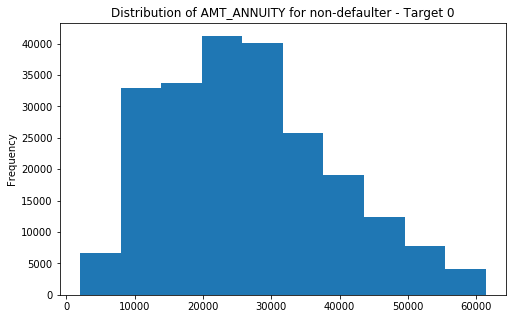

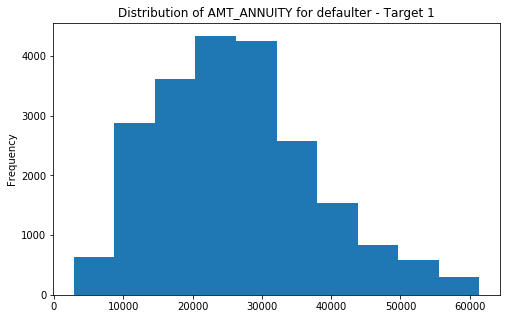

In [163]:

plt.figure(figsize=(8,5))
Target0['AMT_ANNUITY'].plot.hist()
plt.title("Distribution of AMT_ANNUITY for non-defaulter - Target 0")

plt.figure(figsize=(8,5))
Target1['AMT_ANNUITY'].plot.hist()
plt.title("Distribution of AMT_ANNUITY for defaulter - Target 1")

 We can conclude that candidate with large AMT_ANNUITY are mostly repayers and defaulters have comparitively less value for AMT_ANNUITY.

# 7.1.4 Education type of the client


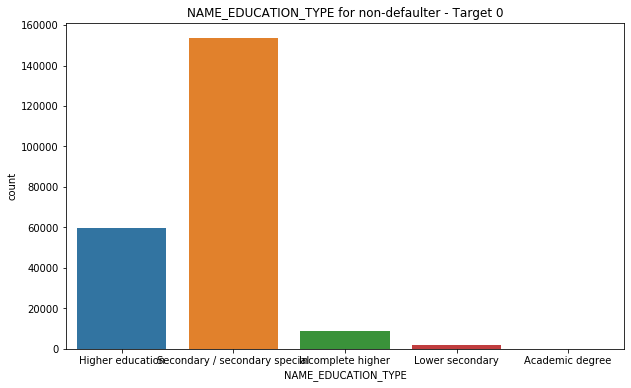

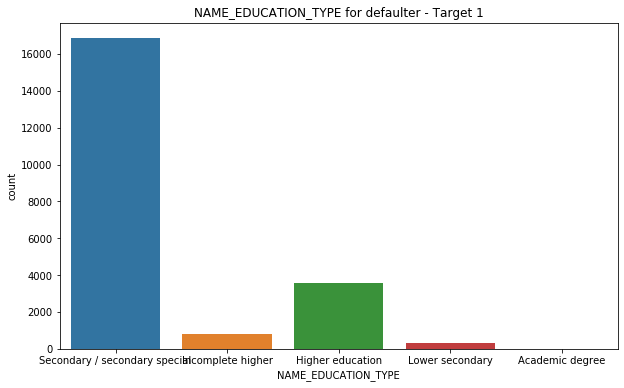

In [165]:
plt.figure(figsize = (10,6))
plt.title('NAME_EDUCATION_TYPE for non-defaulter - Target 0')
sns.countplot(Target0['NAME_EDUCATION_TYPE'])

plt.figure(figsize = (10,6))
plt.title('NAME_EDUCATION_TYPE for defaulter - Target 1')
sns.countplot(Target1['NAME_EDUCATION_TYPE'])


Majority of the clients have Secondary / secondary special education, followed by clients with Higher education.
Only a very small number having an academic degree.

# 7.1.5 Family status of client

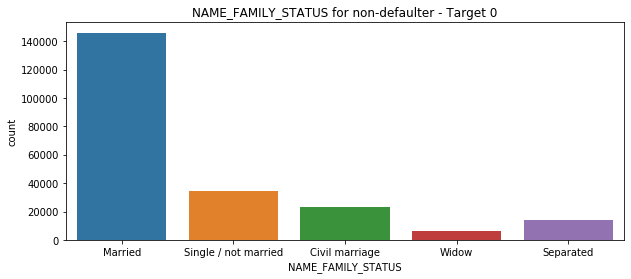

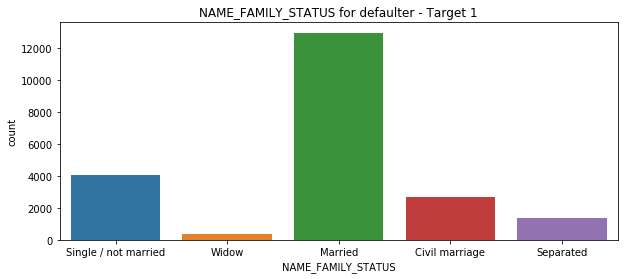

In [166]:

plt.figure(figsize = (10,4))
plt.title('NAME_FAMILY_STATUS for non-defaulter - Target 0')
sns.countplot(Target0['NAME_FAMILY_STATUS'])



plt.figure(figsize = (10,4))
plt.title('NAME_FAMILY_STATUS for defaulter - Target 1')
sns.countplot(Target1['NAME_FAMILY_STATUS'])

Most of clients are married, followed by Single/not married and civil marriage.
In terms of percentage of not repayment and repayment of loan, same pattern follows.

# 7.1.6 OCCUPATION TYPE

Let's investigate the numbers of clients with different occupation type.

Text(0.5, 1, 'OCCUPATION_TYPE for defaulter - Target 1')

<Figure size 720x288 with 0 Axes>

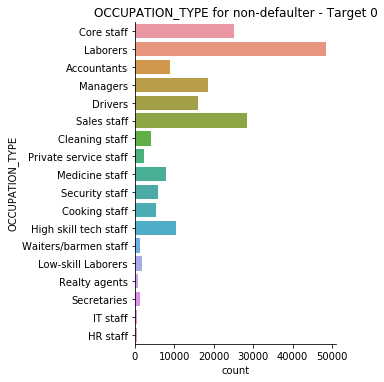

<Figure size 720x288 with 0 Axes>

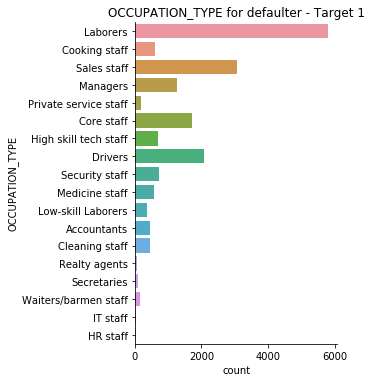

In [167]:

plt.figure(figsize = (10,4))
sns.catplot(y="OCCUPATION_TYPE",kind="count", data=Target0)
plt.title('OCCUPATION_TYPE for non-defaulter - Target 0')

plt.figure(figsize = (10,4))
sns.catplot(y="OCCUPATION_TYPE",kind="count", data=Target1)
plt.title('OCCUPATION_TYPE for defaulter - Target 1')

Most of clients are belongs to Laborers occupation type who opts for loan, followed by Sales / core staff .
In terms of percentage of not repayment and repayment of loan, same pattern follows.

# 7.1.7 Organization type

Text(0.5, 1.0, 'ORGANIZATION_TYPE for non-defaulter - Target 1')

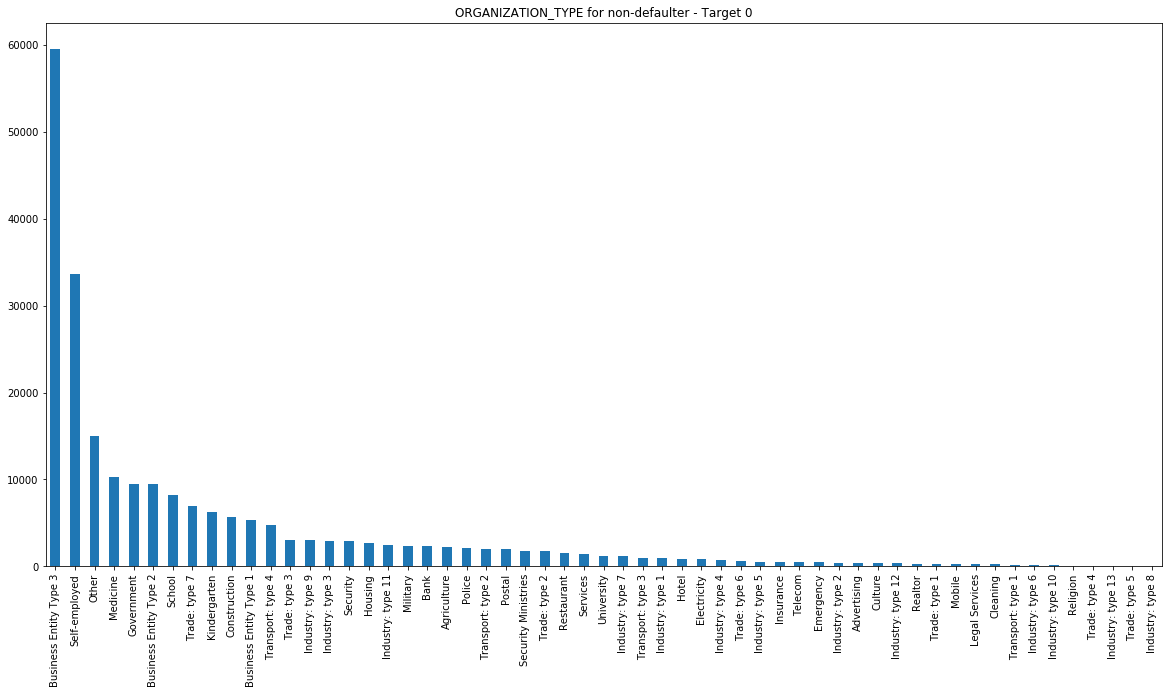

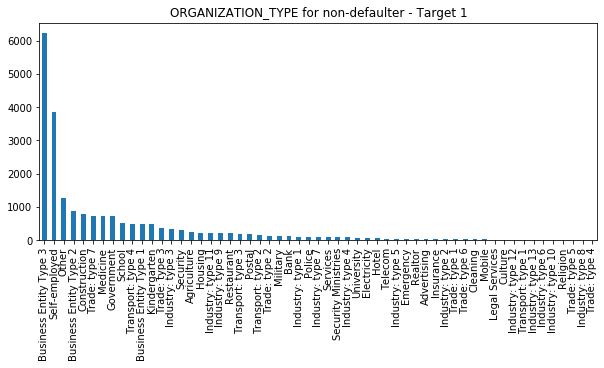

In [168]:

plt.figure(figsize = (20,10))
Target0['ORGANIZATION_TYPE'].dropna().value_counts().plot( x='ORGANIZATION_TYPE', kind = 'bar')
plt.title('ORGANIZATION_TYPE for non-defaulter - Target 0')

plt.figure(figsize = (10,4))
Target1['ORGANIZATION_TYPE'].value_counts().plot( x='ORGANIZATION_TYPE', kind = 'bar')
plt.title('ORGANIZATION_TYPE for non-defaulter - Target 1')


Most of the loans are taken by Business followed by self-employed 


# 7.2 Bivariate Analysis


## 7.2.1 Relation btw Client's Income type and Total Income for non-defaulter and defaulter 

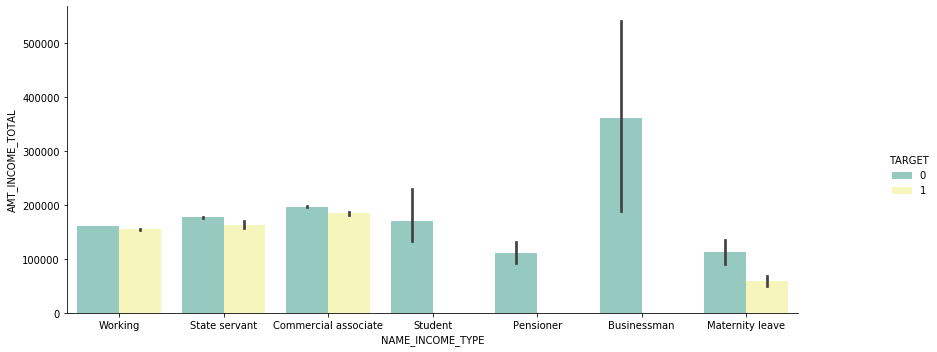

In [210]:

g=sns.catplot(x="NAME_INCOME_TYPE", y="AMT_INCOME_TOTAL", hue="TARGET",
            kind="bar", data=app_data_analysis,palette="Set3");
g.fig.set_figwidth(15)

We can see we dont find Businessman ,students and Pensioner to be defaulter. These Income_types are least likely to be defaulter.
Whereas Total income dont follow any such pattern.

## 7.2.2 Relation btw Client's Education type and Credit amount towards the repayer and defaulter behaviour( Target = 0,1)

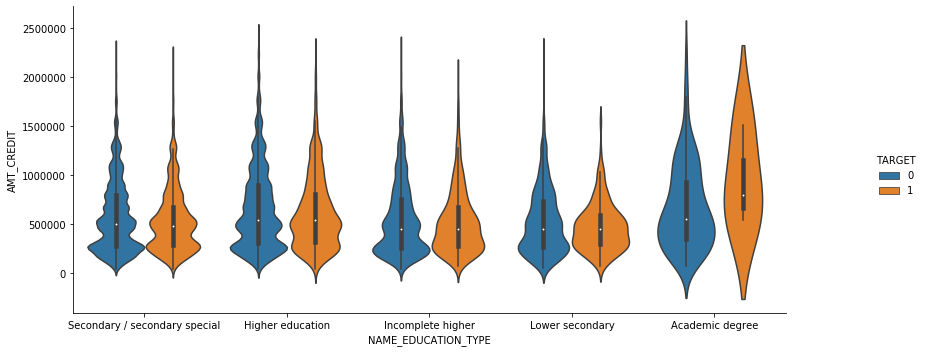

In [178]:
g=sns.catplot(x="NAME_EDUCATION_TYPE", y="AMT_CREDIT", hue="TARGET",kind="violin",
             data=app_data_analysis);
g.fig.set_figwidth(15)

We can see, Secondary/secondary special Education  followed by Higher education type clients are more likely to go for higher Credit Amount. But we don’t see any significant pattern with being defaulter wrt credit amount or education

## 7.2.3 Relation btw Client's Family Status and Annuity amount towards the repayer and defaulter behaviour( Target = 0,1)


<Figure size 1080x432 with 0 Axes>

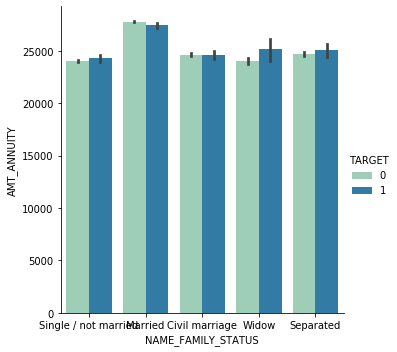

In [216]:

plt.figure(figsize=(15,6))
sns.catplot(x="NAME_FAMILY_STATUS", y="AMT_ANNUITY", hue="TARGET",
            kind="bar",palette="YlGnBu", data=app_data_analysis)


We can see Married and Single are more likely to have high Amt Annuity.
And as the amount increase , the likeliness of candidate to be defaulter decreases. 
Candidate are more likely to be defaulter with less Annuity amount.

# 7.3 Multivariate Analysis

**From the below heatmap,for correlation between variables from the dataset.**

Text(0.5, 1, 'Correlation for non-defaulter')

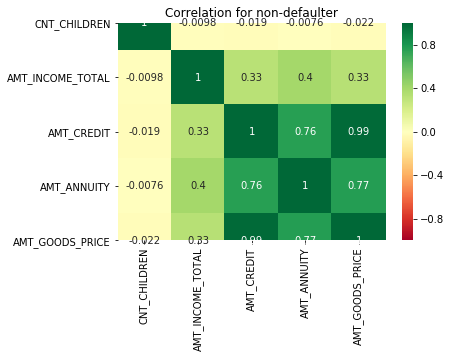

In [180]:
df1= app_data[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','CODE_GENDER','NAME_CONTRACT_TYPE','NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 
               'NAME_HOUSING_TYPE','NAME_FAMILY_STATUS','TARGET']]
T0 = df1[df1['TARGET']==0] 

T1 = df1[df1['TARGET']==1] 

del T0['TARGET']
del T1['TARGET']

corr=T0.corr()
ax= sns.heatmap(corr,annot=True,vmin=-1, vmax=1,center=0,cmap='RdYlGn')
plt.title('Correlation for non-defaulter')


Text(0.5, 1, 'Correlation for defaulter')

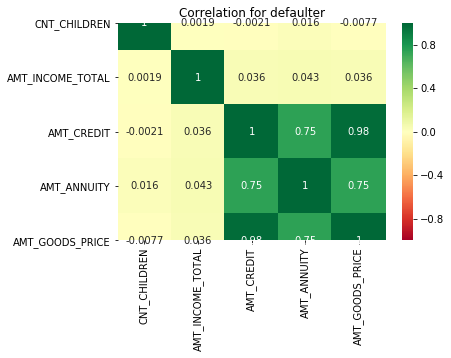

In [181]:
corr=T1.corr()
ax= sns.heatmap(corr,annot=True,vmin=-1, vmax=1,center=0,cmap='RdYlGn')
plt.title('Correlation for defaulter')


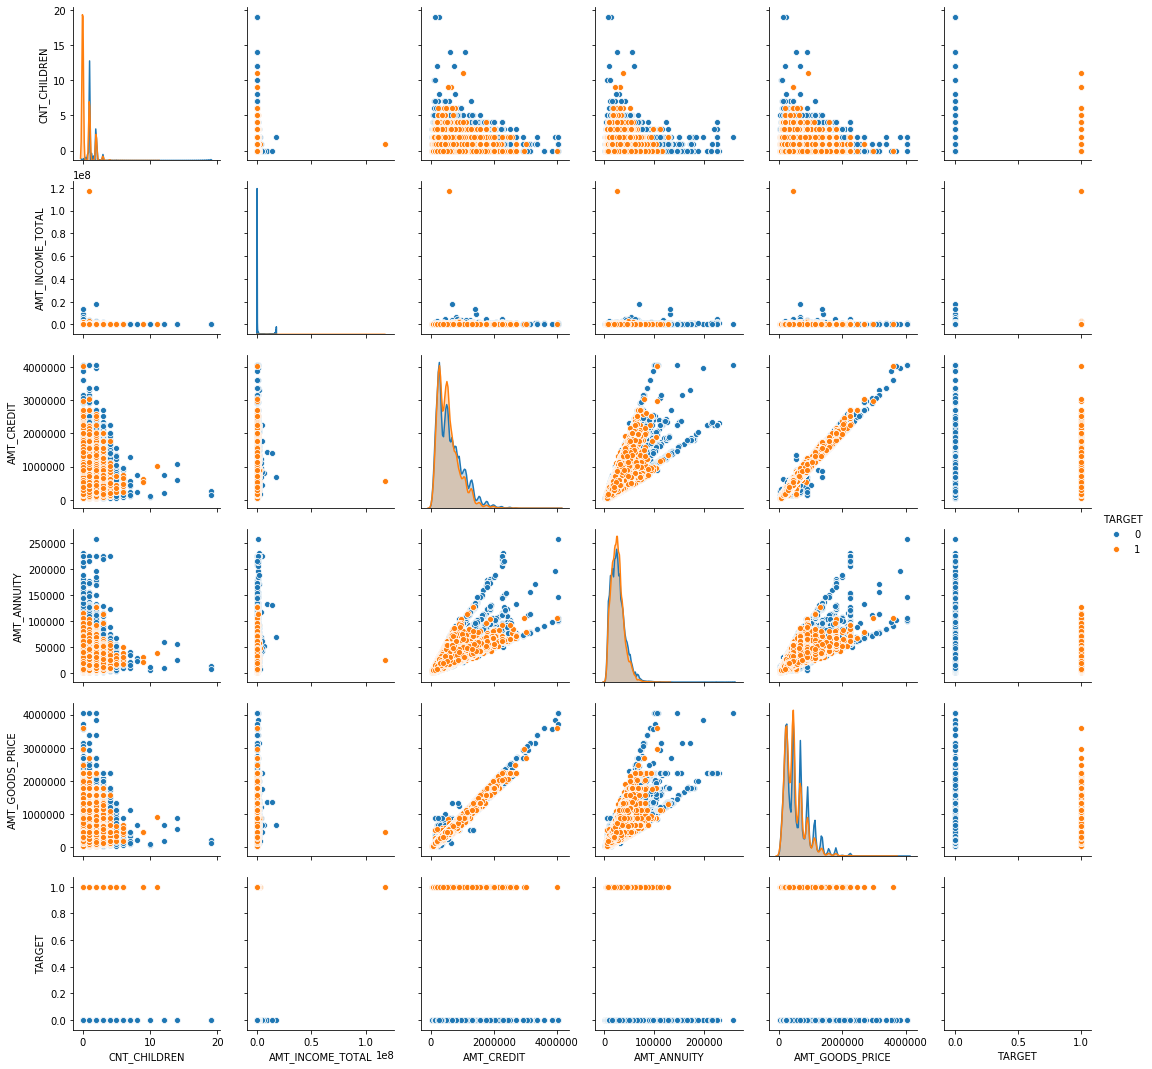

In [182]:
sns.pairplot(df1, hue = 'TARGET')

Based on the above plots and observation ,  we have identify these columns as important variables to get insight whether a candidate is defaulter or non - defaulter

# 8. Merging the app_data_analysis with previous_app_data.


In [184]:
# Merging the data app_data_analysis and prev_app_data for our analysis on column SK_ID_CURR. 
#We would be doing an inner join to makes sure that only the SK_ID_CURR ids present in both dfs are included in the result

merge_app_prev_data = pd.merge(app_data_analysis, prev_app_data, how='inner', on='SK_ID_CURR')


In [185]:
# Verifying the new data frame we created.

merge_app_prev_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED_BINS,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648,Laborers,1,2,2,Business Entity Type 3,0.0149,No,2.0,2.0,2.0,2.0,1134,1,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186,Core staff,2,1,1,School,0.0714,No,1.0,0.0,1.0,0.0,828,2,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186,Core staff,2,1,1,School,0.0714,No,1.0,0.0,1.0,0.0,828,2,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186,Core staff,2,1,1,School,0.0714,No,1.0,0.0,1.0,0.0,828,2,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260,Laborers,1,2,2,Government,NaN,NaN,0.0,0.0,0.0,0.0,815,1,1564014,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,Y,1,0.212008,NaN,NaN,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [186]:
# Verifying the description & info of our new data frame.

merge_app_prev_data.describe()
merge_app_prev_data.shape

(1114741, 65)

In [187]:
# Identifying wheather the column is catagorical or not.

merge_app_prev_data.nunique().sort_values()

NFLAG_INSURED_ON_APPROVAL            2
TARGET                               2
NAME_CONTRACT_TYPE_x                 2
CODE_GENDER                          2
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
EMERGENCYSTATE_MODE                  2
NAME_PRODUCT_TYPE                    3
REGION_RATING_CLIENT_W_CITY          3
REGION_RATING_CLIENT                 3
NAME_CONTRACT_STATUS                 4
NAME_PAYMENT_TYPE                    4
NAME_CONTRACT_TYPE_y                 4
NAME_CLIENT_TYPE                     4
NAME_FAMILY_STATUS                   5
NAME_EDUCATION_TYPE                  5
NAME_PORTFOLIO                       5
NAME_YIELD_GROUP                     5
NAME_HOUSING_TYPE                    6
NAME_INCOME_TYPE                     6
NAME_TYPE_SUITE_y                    7
NAME_TYPE_SUITE_x                    7
WEEKDAY_APPR_PROCESS_START           7
CHANNEL_TYPE                         8
DEF_60_CNT_SOCIAL_CIRCLE             8
CODE_REJECT_REASON       

# 9. Analysis on merged Data frame for "Channel Type" Column.

## 9.1 Univariate

In [190]:
# There is a column named CHANNEL_TYPE in merge_app_prev_data.
# Description of the CHANNEL_TYPE column say "Through which channel we acquired the client on the previous application".
# Basicly it consists of data from where we acquired this client in prev_app_data.
# So lets Calculate the percentage of each categories in the "CHANNEL_TYPE" variable.

merge_app_prev_data.CHANNEL_TYPE.value_counts(normalize=True)

Credit and cash offices       0.405655
Country-wide                  0.317058
Stone                         0.128047
Regional / Local              0.067873
Contact center                0.042247
AP+ (Cash loan)               0.034228
Channel of corporate sales    0.004556
Car dealer                    0.000336
Name: CHANNEL_TYPE, dtype: float64

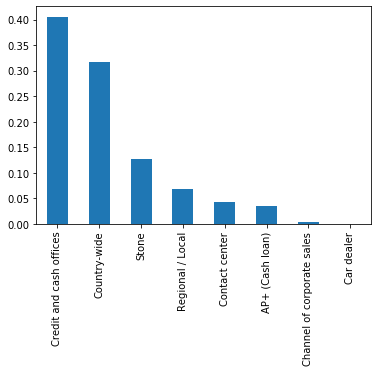

In [191]:
# Now lets make a bar plot with its value count.
merge_app_prev_data.CHANNEL_TYPE.value_counts(normalize=True).plot.bar()

 So as we can see from the above bar plot, majority of the clients are acquired from "Credit & Cash offices" and lowest clients are acquired from Car dealer.

## 9.2 Bivariate

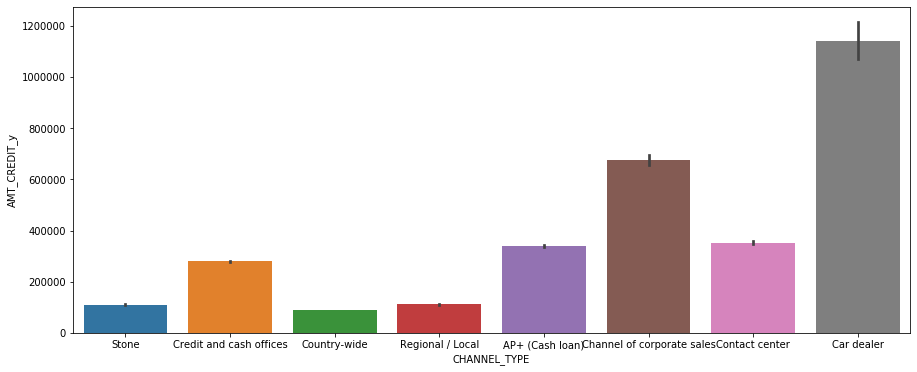

In [189]:
# Now let's check how much of amount has been credited to each of these Channel Types.
# Making a vertical bar plot for the same.
plt.figure(figsize=(15,6))
sns.barplot(x='CHANNEL_TYPE', y='AMT_CREDIT_y', data=merge_app_prev_data)
plt.show()



So Based on the Bar chart we can conclude even through Car dealers, lowest amount of clients are being acquired.
Still Highest amount has been credited to them. 
Similarily "Credit & Cash office" & "Country-wide" provide us quite a big number of clients but the amount credited to them is quite low as compared to other Channel Types.

## 9.3 Multivariate


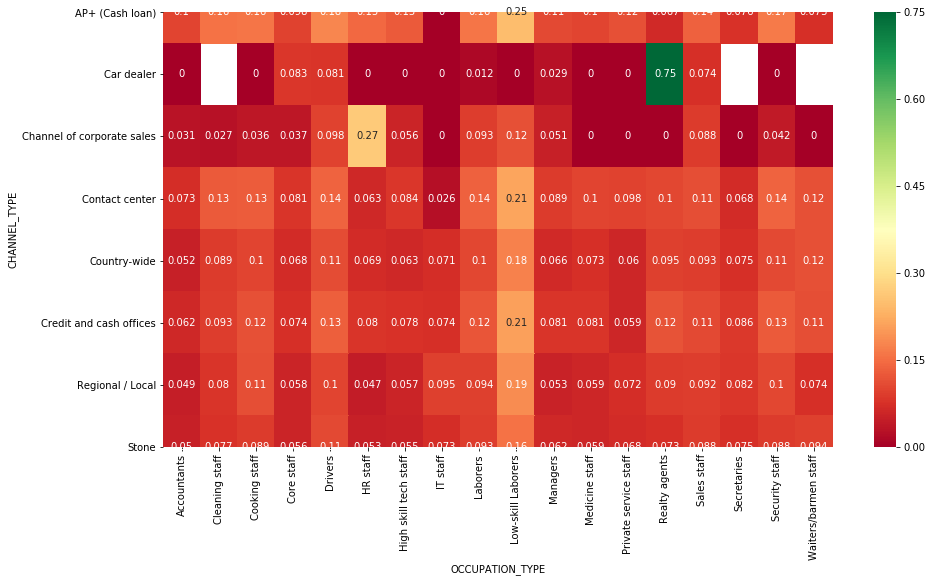

In [208]:
# Now let's analyse what is the type of payment dificulties for these Channel Type. 
# Whether the clients are able to make the payment or not, as based on Target column.
# plotting the heat map :
plt.figure(figsize=(15,8))

res=pd.pivot_table(data=merge_app_prev_data,index='CHANNEL_TYPE',columns='OCCUPATION_TYPE',values='TARGET')
sns.heatmap(res,annot=True,cmap='RdYlGn')

Some subcategories for Channel type doesn't have value for occupation type. So we are getting few blanks.

Based on the above heat map, it is safe to say "Realty Agents" who are acquired through Car dealer are the biggest defaulter in out loan repayments.

# 10. Analysis on merged Data frame for "NAME_CASH_LOAN_PURPOSE " Column.

## 10.1 Univariate

In [193]:
# So now lets analyse of all the clients, who takes cash loan for a particular purpose are the defaulters.
# Before doing that lets see how many unique values  are there for NAME_CASH_LOAN_PURPOSE.
merge_app_prev_data.NAME_CASH_LOAN_PURPOSE.unique()

array(['XAP', 'XNA', 'Other', 'Payments on other loans',
       'Buying a used car', 'Repairs', 'Education', 'Buying a new car',
       'Everyday expenses', 'Urgent needs',
       'Buying a holiday home / land', 'Medicine', 'Car repairs',
       'Building a house or an annex', 'Furniture',
       'Purchase of electronic equipment', 'Wedding / gift / holiday',
       'Buying a home', 'Journey', 'Business development',
       'Gasification / water supply', 'Buying a garage', 'Hobby',
       'Money for a third person', 'Refusal to name the goal'],
      dtype=object)

In [194]:
merge_app_prev_data.OCCUPATION_TYPE.unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', 'Drivers',
       'Sales staff', 'Cleaning staff', nan, 'Private service staff',
       'Medicine staff', 'Security staff', 'Cooking staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [195]:
# As we can see we have lots of XAP & XNA values in our NAME_CASH_LOAN_PURPOSE. So lets change these to null values.
merge_app_prev_data.NAME_CASH_LOAN_PURPOSE.replace("XAP",np.nan,inplace=True)
merge_app_prev_data.NAME_CASH_LOAN_PURPOSE.replace("XNA",np.nan,inplace=True)

merge_app_prev_data.NAME_CASH_LOAN_PURPOSE.unique()

array([nan, 'Other', 'Payments on other loans', 'Buying a used car',
       'Repairs', 'Education', 'Buying a new car', 'Everyday expenses',
       'Urgent needs', 'Buying a holiday home / land', 'Medicine',
       'Car repairs', 'Building a house or an annex', 'Furniture',
       'Purchase of electronic equipment', 'Wedding / gift / holiday',
       'Buying a home', 'Journey', 'Business development',
       'Gasification / water supply', 'Buying a garage', 'Hobby',
       'Money for a third person', 'Refusal to name the goal'],
      dtype=object)

In [196]:
#Lets create a count plot for all the different purposes of applying for a loan.
merge_app_prev_data.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)

Repairs                             0.339748
Other                               0.221076
Urgent needs                        0.120636
Buying a used car                   0.045767
Building a house or an annex        0.040787
Everyday expenses                   0.033804
Medicine                            0.027020
Payments on other loans             0.026524
Education                           0.023389
Journey                             0.017676
Buying a new car                    0.016466
Purchase of electronic equipment    0.015533
Wedding / gift / holiday            0.013411
Car repairs                         0.012796
Buying a home                       0.012637
Furniture                           0.011367
Buying a holiday home / land        0.008134
Business development                0.006309
Gasification / water supply         0.003531
Buying a garage                     0.002103
Hobby                               0.000714
Money for a third person            0.000337
Refusal to

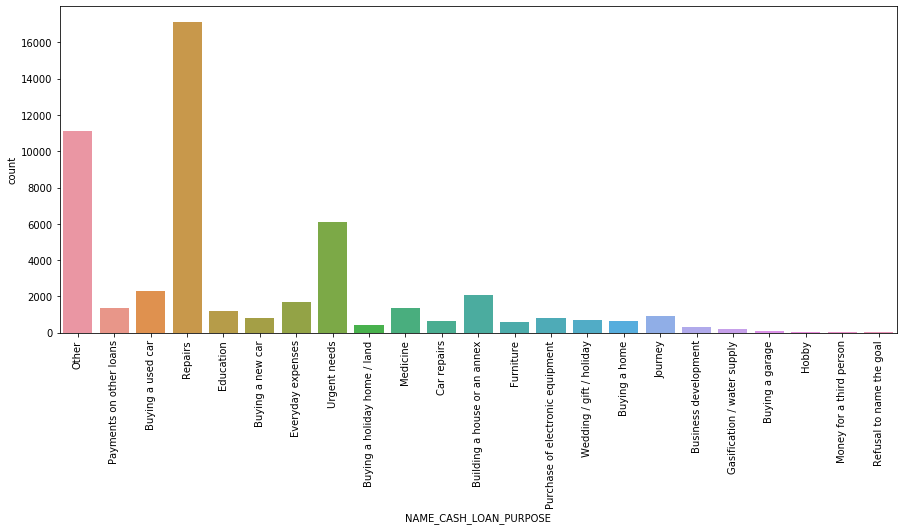

In [197]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.countplot(merge_app_prev_data['NAME_CASH_LOAN_PURPOSE'])

So based on the above count plot, we can see Repairs in one of the biggest reason people are applying for loan. While buying a garage & hobby are the smallest purpose of all. But basically we have to find which cash loan purpose among the above gives us the highest defaulter.

## 10.2 Bivariate

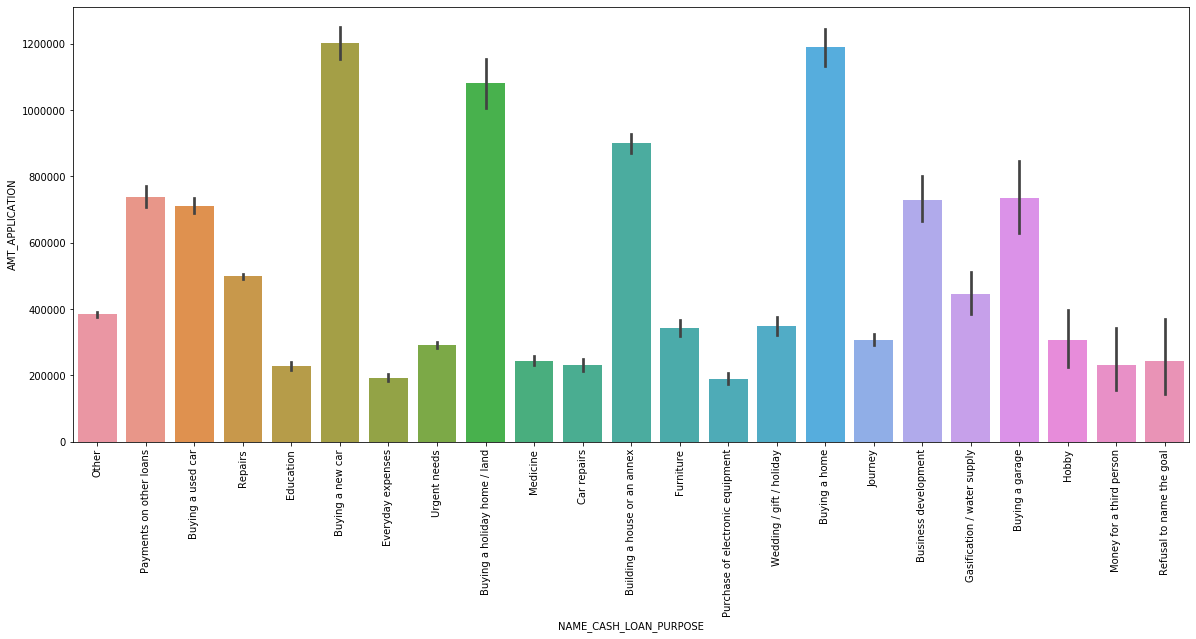

In [198]:
# Now lets make a bar plot for analysing out of all these cash loan purpose what is the amount application, 
# i.e. for each of the cash loan purposes how much credit did client ask on the previous application

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.barplot(x='NAME_CASH_LOAN_PURPOSE', y='AMT_APPLICATION', data=merge_app_prev_data)



Buying a new car & Buying a home even though counts to a small percentage of cash loan purpose 
but they are the purposes for which clients had asked for highest amount.

## 10.3 Multivariate

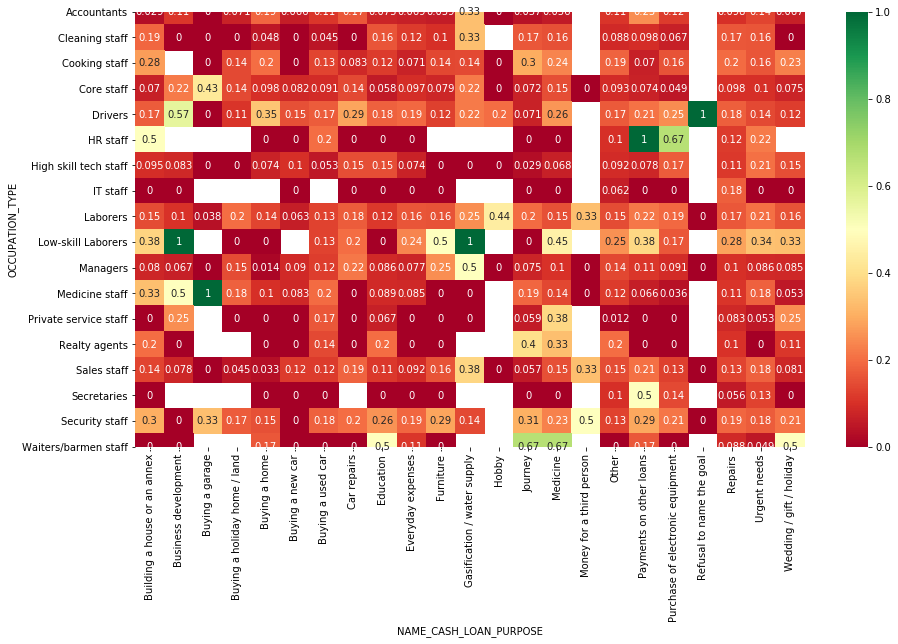

In [199]:
# Now let's analyse for different cash purpose who are among the biggest defaulters in paying the loan back. 
# Whether the clients are able to make the payment or not, as based on Target column.
# plotting the heat map :
plt.figure(figsize=(15,8))

res=pd.pivot_table(data=merge_app_prev_data,index='OCCUPATION_TYPE',columns='NAME_CASH_LOAN_PURPOSE',values='TARGET')
sns.heatmap(res,annot=True,cmap='RdYlGn')


Some subcategories for Occupaton type doesn't have value for cash loan purpose. So we are getting few blanks.

So based on the above heat map we can safely say that following are the OCCUPATION_TYPE - CASH_LOAN_PURPOSE which are the biggest defaulters:
 
 1. Low skilled laborers who asked for loan for purpose as Business Development.
 2. Medicine Staff who asked for loan for purpose as Buying a garage.
 3. Low skilled laborers who asked for loan for purpose as Gasification/water suppy.
 4. HR staff who asked for loan for purpose as payment of other loan.
 5. Driver who asked for loan for purpose as Refusal to the name of loan.

# 11. Analysis on merged Data frame for "NAME_EDUCATION_TYPE " Column.

## 11.1 Univariate

In [200]:
# So now lets analyse of all the clients, and see what type of educations clients have.
# Before doing that lets see how many unique values  are there for NAME_EDUCATION_TYPE.

merge_app_prev_data.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    797838
Higher education                 264951
Incomplete higher                 41418
Lower secondary                   10068
Academic degree                     466
Name: NAME_EDUCATION_TYPE, dtype: int64

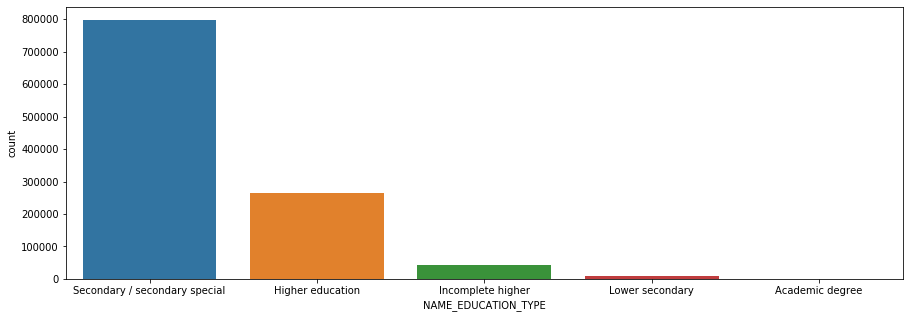

In [201]:
#Creating a countplot to see the dustribution of education types.
plt.figure(figsize=(15,5))
sns.countplot(merge_app_prev_data['NAME_EDUCATION_TYPE'])

There are 5 types of education, highest being Academic degree but they are the lowest in number.
But Secondary / secondary special  are highest in number.

## 11.2 Bivariate

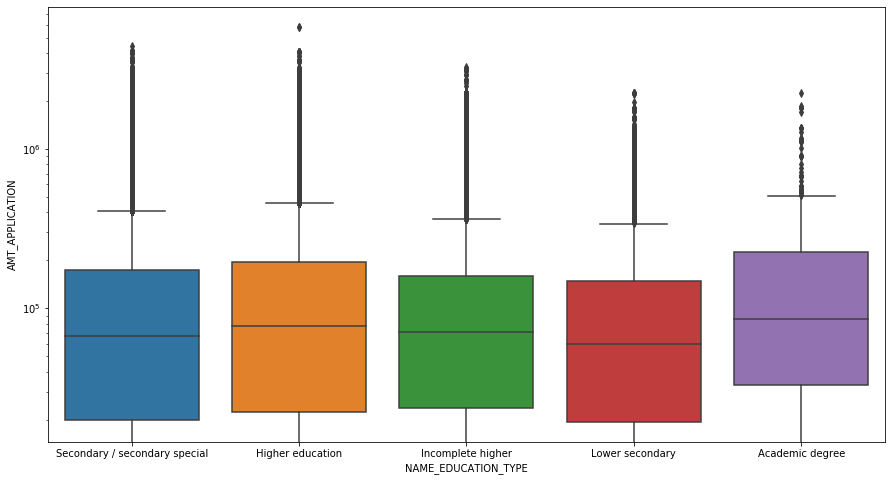

In [203]:
# Now lets make a bar plot for analysing out of all these cash loan purpose what is the amount application, 
# i.e. for each of the cash loan purposes how much credit did client ask on the previous application

plt.figure(figsize=(15,8))
plt.yscale('log')
sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_APPLICATION', data=merge_app_prev_data)

# So we can see from the boxplot below irrespective of the education type AMT_APPLICATION
# i.e.For how much credit did client ask on the previous application is always the same.

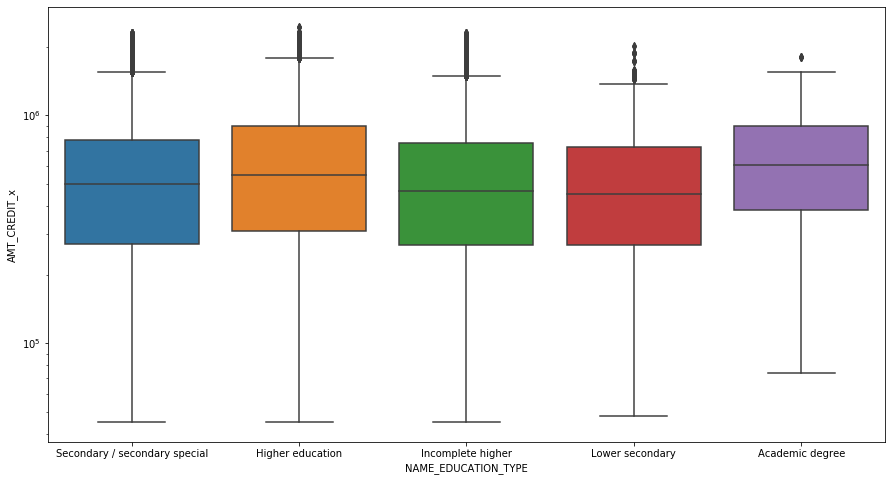

In [204]:
# Lets analyse how much amoutn has been credited based on the eduction of the clients.

plt.figure(figsize=(15,8))
plt.yscale('log')
sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_CREDIT_x', data=merge_app_prev_data)

# It means, most of the time while providing loan the client, education is not considered considerably.

# 11.3 Multivariate

In [205]:
# Now let's analyse for different clients based on their education how many times they are able to pay the 
# loan due back without any difficulties.
# Whether the clients are able to make the payment or not, as based on Target column.


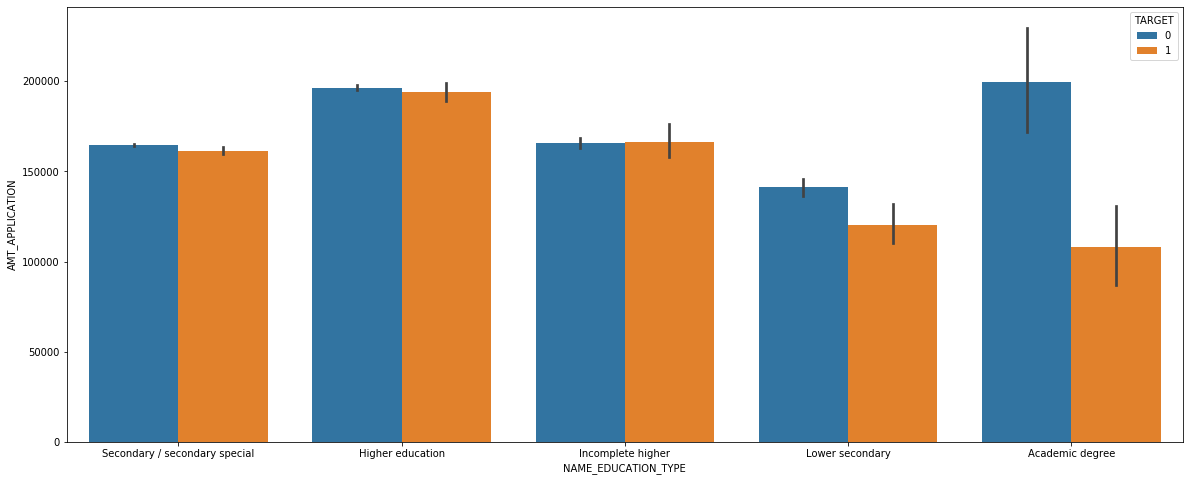

In [209]:
plt.figure(figsize=(20,8))
#plt.xticks(rotation=90)
sns.barplot(x='NAME_EDUCATION_TYPE', y='AMT_APPLICATION',hue='TARGET', data=merge_app_prev_data)


Based on the above barplot we can say, the clients who have "ACADEMIC DEGREE" are in a better position to pay the loan back. So Bank should try to offer loan to these clients as they are banks assets.

# 12. Analysis on merged Data frame for "NAME_CONTRACT_STATUS" Column.

## 12.1 Univariate

In [238]:
# So now lets analyse of all the clients, and see what is the status of their contract.
# Before doing that lets see how many unique values  are there for NAME_EDUCATION_TYPE.

merge_app_prev_data.NAME_CONTRACT_STATUS.value_counts()

Approved        699437
Refused         197515
Canceled        197357
Unused offer     20432
Name: NAME_CONTRACT_STATUS, dtype: int64

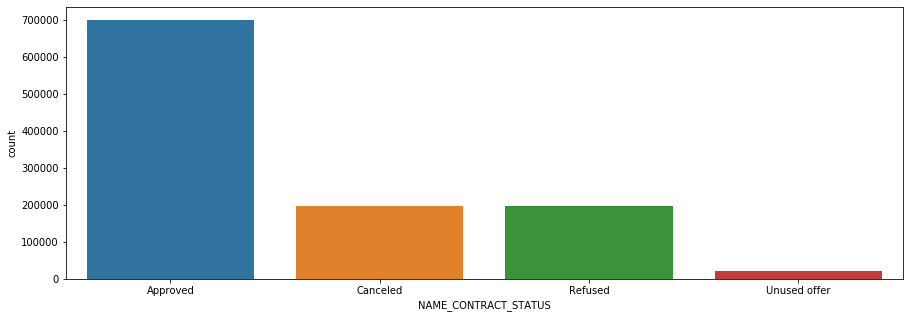

In [239]:
#Creating a countplot to see the dustribution of contract status.
plt.figure(figsize=(15,5))
sns.countplot(merge_app_prev_data['NAME_CONTRACT_STATUS'])

So as we can see from the countplot, most of the contracts that are coming from clients are gettign approved.

## 12.2 Bivariate

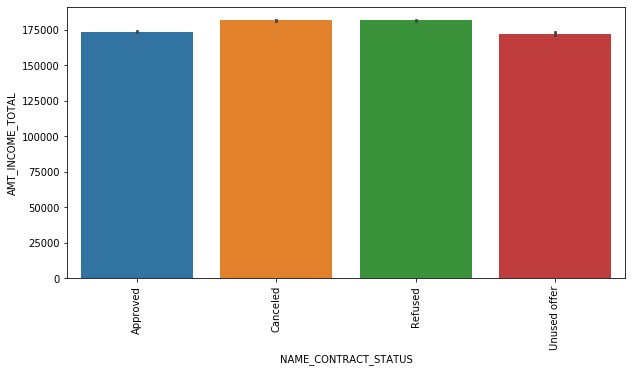

In [244]:
# Now lets make a bar plot for analysing the diversion of total income & contract status.
# i.e. for each of the contract type, what is the total income.

plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(x='NAME_CONTRACT_STATUS', y='AMT_INCOME_TOTAL', data=merge_app_prev_data)

# Buying a new car & Buying a home even though counts to a small percentage of cash loan purpose 
# but they are the purposes for which clients had asked for highest amount.

So, as we can see through the barplot, irrespective of the Income, mostly all the contracts have same total income. This means, while providing loan total incoem is not taken into consideration much.

# 12.3 Multivariate

In [ ]:
# Now let's analyse for different clients based on their annual income how many times they are able to pay the 
# loan due back without any difficulties. who's contract have been approved or not
# Whether the clients are able to make the payment or not, as based on Target column.


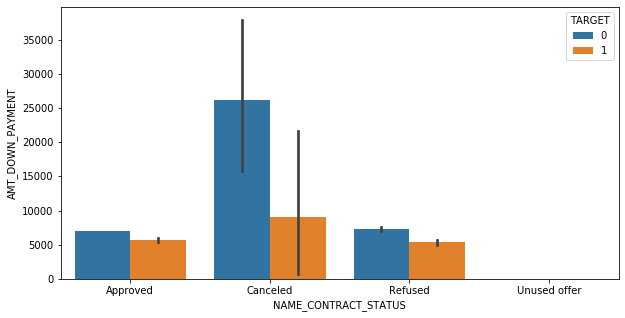

In [253]:
plt.figure(figsize=(10,5))
#plt.xticks(rotation=90)
sns.barplot(x='NAME_CONTRACT_STATUS', y='AMT_DOWN_PAYMENT',hue ='TARGET' ,data=merge_app_prev_data)


So we can see from bar plot, for clients who paid higher Down payment in previous application , their contract is getting Cancelled. Who in generally are non defaulter. 
So for higher revenue of bank any client who paid higher downpayment in previos application their contract should get approved as they are non defaulter.

# 13. Analyse correlation between variables 

In [213]:
# Let make a new data frame from merge_app_prev_data with selected columns for our analysis.

merge_app_prev_data1=merge_app_prev_data[['TARGET','AMT_INCOME_TOTAL','AMT_CREDIT_x','OCCUPATION_TYPE','AMT_APPLICATION','AMT_ANNUITY_x','AMT_DOWN_PAYMENT','DAYS_EMPLOYED','REGION_RATING_CLIENT']].copy()



In [214]:
merge_app_prev_data1.head()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT_x,OCCUPATION_TYPE,AMT_APPLICATION,AMT_ANNUITY_x,AMT_DOWN_PAYMENT,DAYS_EMPLOYED,REGION_RATING_CLIENT
0,1,202500.0,406597.5,Laborers,179055.0,24700.5,0.0,637,2
1,0,270000.0,1293502.5,Core staff,900000.0,35698.5,NaN,1188,1
2,0,270000.0,1293502.5,Core staff,337500.0,35698.5,0.0,1188,1
3,0,270000.0,1293502.5,Core staff,68809.5,35698.5,6885.0,1188,1
4,0,67500.0,135000.0,Laborers,24282.0,6750.0,4860.0,225,2


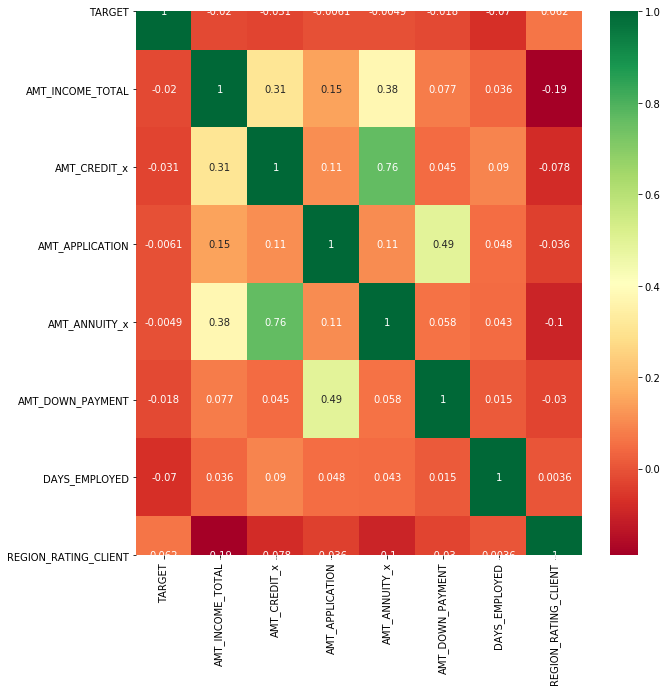

In [215]:
plt.figure(figsize=(10,10))
sns.heatmap(merge_app_prev_data1.corr(), annot = True,cmap='RdYlGn')

So based on above correlation map we can safely say the highest correlation is between AMT_ANNUITY & AMT_CREDIT.